In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("TümörVerisi.xlsx")

In [6]:
df.head()

,Hasta ID,Tümör Yarıçapı (mm),Tümör Hacmi (mm3),Bağ Dokusu (Yok = 0; Var = 1),Diferansiasyon Hızı (mm/yıl),Etiket (İyi Huylu = 0; Kötü Huylu = 1),Naif Algoritma,False Positive,False Negative
0,1.0,102.0,4.441814e+06,1.0,0.229958,1.0,1,0.0,0.0
1,2.0,79.0,2.063676e+06,0.0,12.757216,1.0,1,0.0,0.0
2,3.0,8.0,2.143569e+03,1.0,8.317290,0.0,0,0.0,0.0
3,4.0,46.0,4.074118e+05,1.0,6.818729,1.0,0,0.0,1.0
4,5.0,18.0,2.441131e+04,1.0,2.802301,0.0,0,0.0,0.0


In [8]:
# dandik fonksiyon
def Perform_Naive_Classification (df,threshold=.5):
    result_array = []
    benign = 0
    malign = 1
    for i in range(len(df["Hasta ID"])):
        a = df["Tümör Yarıçapı (mm)"].iloc[i]
        if a >= threshold:
            result_array.append(malign)
        else:
            result_array.append(benign)
    return result_array
            
        
    
    

In [63]:
# dandik fonksiyon
def Perform_Naive_Classification2 (df,threshold=.5):
    result_array = []
    benign = 0
    malign = 1
    for i in range(len(df["Hasta ID"])):
        a = df["Tümör Yarıçapı (mm)"].iloc[i]
        b = df["Bağ Dokusu (Yok = 0; Var = 1)"].iloc[i]
        if a >= threshold or b==1:
            result_array.append(malign)
        else:
            result_array.append(benign)
    return result_array
            
        

<AxesSubplot:ylabel='Count'>

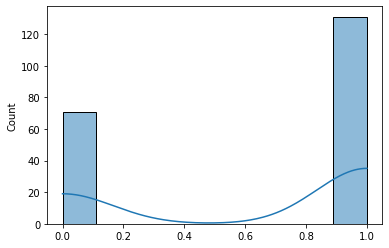

In [14]:
result = Perform_Naive_Classification(df,40)
import seaborn as sns
sns.histplot(result,kde=True)

In [15]:
# daha az dandik fonksiyon
def Perform_Naive_Classification_with_apply_func (df,threshold=.5):
    df["Output"]=df["Tümör Yarıçapı (mm)"].apply(lambda x : 1 if x>= threshold else 0)
    return df["Output"]

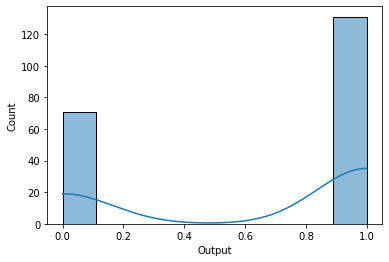

In [22]:
result = Perform_Naive_Classification_with_apply_func(df,40)
sns.histplot(result,kde=True)
plt.show()

In [24]:
# daha daha az dandik fonksiyon
import numpy as np
def Perform_Naive_Classification_with_np (df,threshold=.5):
    return np.array(df["Tümör Yarıçapı (mm)"]>=threshold,dtype=np.float)

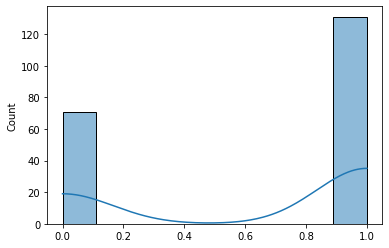

In [25]:
result = Perform_Naive_Classification_with_np(df,40)
sns.histplot(result,kde=True)
plt.show()

In [36]:
# Performance
def Evaluate_Performance(df,result_array):
    number_of_true_positives = 0
    number_of_true_negatives = 0
    number_of_false_positives = 0
    number_of_false_negatives = 0
    for i in range(len(df["Hasta ID"])):
        truth = df["Etiket (İyi Huylu = 0; Kötü Huylu = 1)"].iloc[i]
        response = result_array[i]
        if truth == 1 and response == 1:
            number_of_true_positives += 1
        elif truth == 1 and response == 0:
            number_of_false_negatives += 1
        elif truth == 0 and response == 0:
            number_of_true_negatives += 1
        else:
            number_of_false_positives += 1
    tp = number_of_true_positives
    tn = number_of_true_negatives
    fp = number_of_false_positives
    fn = number_of_false_negatives
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    f1_score = (2*precision*sensitivity)/(precision+sensitivity)
    false_positive_rate = 1-specificity
    print('Sensitivity: {}, \nSpecificity: {}, \nAccuracy: {}, \nPrecision: {}, \nF1 Score: {}, \nFalse Positive Rate: {}'.format(sensitivity,specificity,accuracy,precision,f1_score,false_positive_rate))
    return sensitivity,specificity,accuracy,precision,f1_score,false_positive_rate
    
    

In [37]:
Evaluate_Performance(df,result)

Sensitivity: 0.8189655172413793, 
Specificity: 0.5581395348837209, 
Accuracy: 0.7079207920792079, 
Precision: 0.7142857142857143, 
F1 Score: 0.7630522088353414, 
False Positive Rate: 0.4418604651162791


(0.8189655172413793,
 0.5581395348837209,
 0.7079207920792079,
 0.7142857142857143,
 0.7630522088353414,
 0.4418604651162791)

In [58]:
def PerformROC_analysis(df):
    threshold_upper_bound=100
    step=10
    array_1=[]
    array_2=[]
    for threshold in range(0,threshold_upper_bound,step):
        result=Perform_Naive_Classification(df,threshold)
        (sensitivity,specificity,accuracy,precision,f1_score,false_positive_rate)=Evaluate_Performance(df,result)
        array_1.append(1-specificity)
        array_2.append(sensitivity)
        plt.plot((1-specificity),sensitivity,"o")
    plt.plot(np.array(array_1),np.array(array_2))
    

Sensitivity: 0.9741379310344828, 
Specificity: 0.023255813953488372, 
Accuracy: 0.5693069306930693, 
Precision: 0.5736040609137056, 
F1 Score: 0.7220447284345048, 
False Positive Rate: 0.9767441860465116
Sensitivity: 0.9224137931034483, 
Specificity: 0.12790697674418605, 
Accuracy: 0.5841584158415841, 
Precision: 0.5879120879120879, 
F1 Score: 0.7181208053691275, 
False Positive Rate: 0.872093023255814
Sensitivity: 0.8879310344827587, 
Specificity: 0.29069767441860467, 
Accuracy: 0.6336633663366337, 
Precision: 0.6280487804878049, 
F1 Score: 0.7357142857142858, 
False Positive Rate: 0.7093023255813953
Sensitivity: 0.8362068965517241, 
Specificity: 0.47674418604651164, 
Accuracy: 0.6831683168316832, 
Precision: 0.6830985915492958, 
F1 Score: 0.7519379844961241, 
False Positive Rate: 0.5232558139534884
Sensitivity: 0.8189655172413793, 
Specificity: 0.5581395348837209, 
Accuracy: 0.7079207920792079, 
Precision: 0.7142857142857143, 
F1 Score: 0.7630522088353414, 
False Positive Rate: 0.441

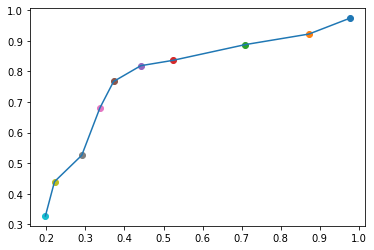

In [51]:
PerformROC_analysis(df)
plt.show()

In [64]:
def PerformROC_analysis2(df):
    threshold_upper_bound=100
    step=10
    array_1=[]
    array_2=[]
    for threshold in range(0,threshold_upper_bound,step):
        result=Perform_Naive_Classification2(df,threshold)
        (sensitivity,specificity,accuracy,precision,f1_score,false_positive_rate)=Evaluate_Performance(df,result)
        array_1.append(1-specificity)
        array_2.append(sensitivity)
        plt.plot((1-specificity),sensitivity,"o")
    plt.plot(np.array(array_1),np.array(array_2))
    

Sensitivity: 1.0, 
Specificity: 0.011627906976744186, 
Accuracy: 0.5792079207920792, 
Precision: 0.5771144278606966, 
F1 Score: 0.7318611987381703, 
False Positive Rate: 0.9883720930232558
Sensitivity: 0.9913793103448276, 
Specificity: 0.03488372093023256, 
Accuracy: 0.5841584158415841, 
Precision: 0.5808080808080808, 
F1 Score: 0.7324840764331211, 
False Positive Rate: 0.9651162790697675
Sensitivity: 0.9827586206896551, 
Specificity: 0.12790697674418605, 
Accuracy: 0.6188118811881188, 
Precision: 0.6031746031746031, 
F1 Score: 0.7475409836065573, 
False Positive Rate: 0.872093023255814
Sensitivity: 0.9568965517241379, 
Specificity: 0.2441860465116279, 
Accuracy: 0.6534653465346535, 
Precision: 0.6306818181818182, 
F1 Score: 0.7602739726027398, 
False Positive Rate: 0.7558139534883721
Sensitivity: 0.9568965517241379, 
Specificity: 0.26744186046511625, 
Accuracy: 0.6633663366336634, 
Precision: 0.6379310344827587, 
F1 Score: 0.7655172413793104, 
False Positive Rate: 0.7325581395348837
S

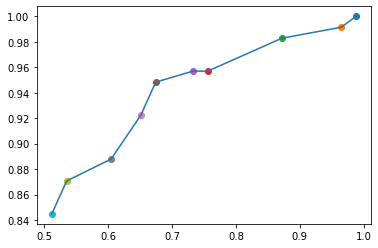

In [65]:
PerformROC_analysis2(df)
plt.show()

Sensitivity: 0.9741379310344828, 
Specificity: 0.023255813953488372, 
Accuracy: 0.5693069306930693, 
Precision: 0.5736040609137056, 
F1 Score: 0.7220447284345048, 
False Positive Rate: 0.9767441860465116
Sensitivity: 0.9224137931034483, 
Specificity: 0.12790697674418605, 
Accuracy: 0.5841584158415841, 
Precision: 0.5879120879120879, 
F1 Score: 0.7181208053691275, 
False Positive Rate: 0.872093023255814
Sensitivity: 0.8879310344827587, 
Specificity: 0.29069767441860467, 
Accuracy: 0.6336633663366337, 
Precision: 0.6280487804878049, 
F1 Score: 0.7357142857142858, 
False Positive Rate: 0.7093023255813953
Sensitivity: 0.8362068965517241, 
Specificity: 0.47674418604651164, 
Accuracy: 0.6831683168316832, 
Precision: 0.6830985915492958, 
F1 Score: 0.7519379844961241, 
False Positive Rate: 0.5232558139534884
Sensitivity: 0.8189655172413793, 
Specificity: 0.5581395348837209, 
Accuracy: 0.7079207920792079, 
Precision: 0.7142857142857143, 
F1 Score: 0.7630522088353414, 
False Positive Rate: 0.441

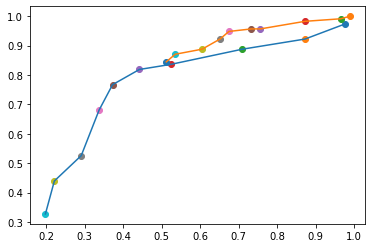

In [66]:
PerformROC_analysis(df)
PerformROC_analysis2(df)
plt.show()